# **Exercise 07: Introduction to Deep Learning**

## **Exercise 07.1: Theory** 

### **1.1 Describe the basic building blocks and structure of an MLP in your own words**

MLP is the abbreviation for **Multilayer Perceptron**. It is a neural network that consists of multiple **fully-connected layers **of neurons. Fully-connected means that each neuron in a layer sees all the output of the previous layer, so each neuron in the first hidden layer sees all the input. 

**Neuron**: In a neuron, each individual **input is multiplied by a learned weight. The products are summed, a bias is added, and the value is passed through an activation function** to calculate the final output.  

**Input layer**: The first layer in the MLP, which **consists of the input**. 

**Hidden layer(s)**: layer with a certain number of neurons. **The number of neurons can be specified**. An MLP can consist of several hidden layers. The layers are called hidden because when using the neural network, we interact only with the input and output layers and do not "see" the hidden layers.  

**Output layer**: neuron layer for the final prediction of the MLP. We choose the number of **neurons in this layer depending on the problem we want to solve**. For example, if we want to classify 10 classes, the output layer consists of 10 neurons.



### **1.2 Describe the difference between a linear problem and a nonlinear problem**

A linear problem can be solved by a linear model. A linear model is only able to approximate a linear function (straight line) to solve the problem. Nonlinear problems are not linear separable and can only be solved by nonlinear models that are able to approximate nonlinear functions.

### **1.3 Describe the Universal Approximation Theorem in your own words**

The Universal Approximation Theorem states that for any given continuous function, there is a neural network that can approximate it. This is the theoretical foundation for why neural networks work.

## **Exercise 07.2: Application**

### **2.1 Read the MNIST Dataset and plot some examples (train/eval/test split)**

We use Pytorch to read the MNIST dataset for our model and make sure that it is split into train/test subsets. There is no official eval subset for MNIST, so we use some data from the training subset to create our own eval subset. To see if the dataset is read correctly, we present some examples and the corresponding class with Matplotlib.

Tip: torchvision.datasets is a simple, high-level API for downloading and reading datasets.

In [ ]:
import torch

from torchvision import datasets

# Transforms allow us to apply transformations on the data. 
# A simple example is the transform "transforms.ToTensor()" which allows us to return a dataset of tensors instead of PIL images.
# Other transformations include normalizations and augmentations, such as cropping parts of an image.
from torchvision import transforms

# For random processes in Torch, we can set an arbitrary number as the seed. This makes the program deterministic and the random processes behave exactly the same every time the program is started.
torch.manual_seed(42)

# All datasets are subclasses of torch.utils.data.Dataset and have a similar API. 
# With the first argument (root) we specify the location where we the data is located or saved.
# If train=True the training set is loaded, if False the test set is loaded.
# Many datasets can be downloaded automatically when download=True. 
# The transform argument allows us to apply transformations to the data. These transformations can consist of several transformations (especially augmentations) in real applications
dataset = datasets.MNIST('../data', train=True, download=True, transform=transforms.ToTensor())

# Randomly split a dataset into non-overlapping new datasets of given lengths.
# We use this function to create a training and evaluation set from the official training data.
# The training set will have 50000 examples, the evaluation set 10000.
train_dataset, eval_dataset = torch.utils.data.random_split(dataset, [50000, 10000])

# The test set has 10000 examples.
test_dataset = datasets.MNIST('../data', train=False, transform=transforms.ToTensor())

# Print information of the dataset.
print("Succesfully read the dataset:")
print(f"The training data contains {len(train_dataset)} examples.")
print(f"The evaluation data contains {len(eval_dataset)} examples.")
print(f"The test data contains {len(test_dataset)} examples.")

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

Succesfully read the dataset:
The training data contains 50000 examples.
The evaluation data contains 10000 examples.
The test data contains 10000 examples.


Now we can use the dataset to plot some examples.

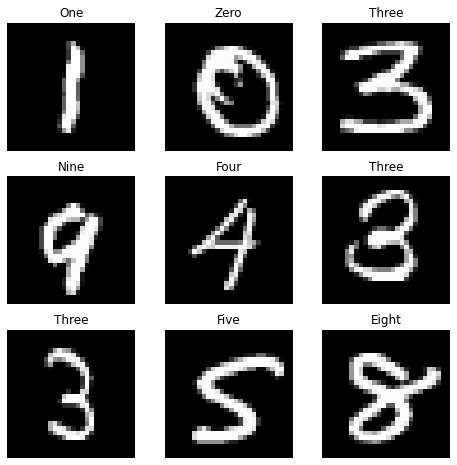

In [ ]:
import matplotlib.pyplot as plt

# The label of each given sample (image) is simply a number. For visualization, we can create a map that maps this number to the class name.  
# This is not very useful for MNIST, but for datasets containing, for example, animals such a map can be very useful.
mnist_labels_map = {
    0: "Zero",
    1: "One",
    2: "Two",
    3: "Three",
    4: "Four",
    5: "Five",
    6: "Six",
    7: "Seven",
    8: "Eight",
    9: "Nine",
}

# Prepare the plot.
figure = plt.figure(figsize=(8, 8))

# We plot 9 images in a 3x3 grid.
cols, rows = 3, 3

# For each iamge we want to plot:
for i in range(1, cols * rows + 1):
    # We create an index of the dataset at random to randomly select a sample.
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()

    # With this index we select the sample and its label.
    img, label = train_dataset[sample_idx]

    # And we plot the image with the corresponding label name.
    figure.add_subplot(rows, cols, i)
    plt.title(mnist_labels_map[label])
    plt.axis("off")

    # IMPORTANT: The sample is given in [c,w,h] shape([image-channels, image-widht, image-height] e.g., [1,28,28] for MNIST). 
    # Pytorch uses this format for performance reasons on the hardware.
    # To plot the image we need to bring it back into the "normal" [w,h,c] shape.
    img = img.permute((1,2,0))
    plt.imshow(img.squeeze(), cmap="gray")

plt.show()

### **2.2 Build your own MLP with Pytorch (we will train it in the next exercise)**

In [ ]:
import torch.nn as nn

# We define an MLP class that is a subclass of nn.Module.
# nn.Module is the base class for all neural networks modules in Pytorch and provides basic functions 
class MLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(MLP, self).__init__()
        self.input_size = input_size

        # We use nn.Sequential, which contains our layers and can be used to easily create simple models. 
        # When `layers` is run,  input will first be passed to 'Linear(input_size, 32)', then 'nn.ReLU(), then 'nn.Linear(32, 64)' and so on.
        self.layers = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, output_size)
        )
        
    def forward(self, x):
        # For images the input x will have the shape [b,c,w,h] where b is the batch size.
        # The batch size will be explained in more detail in the next lecture. With batch_size we define the number of samples that are fed to the model in one step.
        # However, our MLP expects a flat vector for each sample as input: [b,c*w*h].
        # With .view we can return a new tensor with the same data as the self tensor but of a different shape.
        x = x.view(-1, self.input_size)

        # We call the forward function of our layers.
        x = self.layers(x)
        return x

In [ ]:
# The size of the input of the model: image width*height*depth (1 because its a grayscale image)
mnist_input_size = 28*28*1

# The number of classes in the dataset
mnist_num_classes = 10 

# Define the Model 
model = MLP(input_size=mnist_input_size, output_size=10)

# Print model
print(model)

MLP(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=32, bias=True)
    (1): ReLU()
    (2): Linear(in_features=32, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)


### **2.3 Evaluate the untrained model on the test data**

First we want to have a GPU as runtime (Laufzeit->Laufzeittyp ändern).

In [ ]:
# We can check what kind of GPU we got.
!nvidia-smi

Wed Mar  2 14:08:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P8    33W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch.nn.functional as F

# This function validates the model on the given data.
def val(data_loader, model, training_epoch, device, mode="eval"):
    # First, we put the model into evaluation mode. 
    model.eval()
    
    # We define variables for the loss and the number of correctly classified samples.
    loss = 0
    correct = 0

    # We do not want our validation function to participate in the gradient calculation (more on this in the next lecture).
    with torch.no_grad():
        # We iterate over the entire data set. 
        # The variable data contains the images. 
        # The variable target contains the name of the images.
        for data, target in data_loader:

            # We put the data onto the selected device.
            # Shapes: 
            # data: [b,c,w,h]
            # target: [b] - Single number of the label for each sample.
            data, target = data.to(device), target.to(device)

            # We call the forward function of our model to get the prediction of the model for our data.
            # output shape: [b,10] -  The outputs of the 10 neurons in the last layer, where each neuron represents a class.
            output = model(data)

            # We calculate the validation loss.
            loss += F.cross_entropy(output, target, reduction='sum').item()  # sum up batch loss

            # With argmax we calculate the index of the output neuron with the highest value (this index is the class).
            # pred shape: [b,1]
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability

            # If the prediction of the MLP matches the true class, we add this prediction to the number of correct classes.
            correct += pred.eq(target.view_as(pred)).sum().item()

    # For total loss, the sum of the losses from each example is defined by the number of samples in the dataset.
    loss /= len(data_loader.dataset)        

    # For accuracy (in percent), we define the correctly predicted classes by the number of samples in the dataset.
    accuracy = round(correct / len(data_loader.dataset) * 100, 2)

    # We print the results.
    print(f"\nValidation for {mode} data after Epoch: {training_epoch}\t Accuracy: {accuracy}\t Loss {loss}\n")
    return loss, accuracy

In [ ]:
# We want to run our model on a GPU, so we choose "cuda" as the device. Alternatively, we can run our model on the CPU with "cpu".
device = "cuda"
# The batch size will be explained in more detail in the next lecture. With batch_size we define the number of samples that are fed to the model in one step.
batch_size = 64

# With the DataLoader we can load data from our dataset step by step. 
# With the argument batch_size we can specify how mach samples are loaded in one batch.
# With shuffel it can be specified whether the data set should be shuffled and returned in a random order. If all data is loaded once and shuffel=true, the data set will be shuffled again.
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
eval_loader = torch.utils.data.DataLoader(eval_dataset, batch_size=batch_size)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size)
 
# We load the model into the VRAM of the GPU.
model.to(device)

# First we test our untrained model on the entire validation data.
# In the future, we will use the evaluation dataset to validate our model during training and tuning.
val(eval_loader, model, training_epoch=0, device=device)
print("Evaluation complete.")

# We test our final tuned model on the test data to report our final results.
val(test_loader, model, training_epoch=0, device=device, mode="test")
print("Test complete.")


Validation for eval data after Epoch: 0	 Accuracy: 7.88	 Loss 2.3035698932647706

Evaluation complete.

Validation for test data after Epoch: 0	 Accuracy: 7.46	 Loss 2.304480449295044

Test complete.
